# Extracción de datos

In [1]:
#Importamos librerias necesarias para la conexion con google drive

#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

#Definimos las clases que usaremos para la extraccion de datos desde google drive

#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#Definimos las direcciones (url) que usaremos para nuestras 5 tablas
# 1
##https://drive.google.com/file/d/1Tdb-vlOy18bhxpo_573n0Fonh2uisbzS/view?usp=sharing
#admissions = drive.CreateFile({'id':'1Tdb-vlOy18bhxpo_573n0Fonh2uisbzS'})
# 2
##https://drive.google.com/file/d/1L0xhQ1v-Ud6wT9mOq7DGo0edXn9tNnhV/view?usp=sharing
#callout = drive.CreateFile({'id':'1L0xhQ1v-Ud6wT9mOq7DGo0edXn9tNnhV'})
# 3
##https://drive.google.com/file/d/1uh4FBYsy0x0n2IsGykxrPi4vFhHtUIfK/view?usp=sharing
#icustays = drive.CreateFile({'id':'1uh4FBYsy0x0n2IsGykxrPi4vFhHtUIfK'})
# 4
##https://drive.google.com/file/d/13bQ17lnoRv8M-EB8EkWTDgtKEzDB1h5H/view?usp=sharing
#patients = drive.CreateFile({'id':'13bQ17lnoRv8M-EB8EkWTDgtKEzDB1h5H'})
# 5
##https://drive.google.com/file/d/1g1kD2rY--YnFyPFNoy89gyF6-juKitQr/view?usp=sharing
#services = drive.CreateFile({'id':'1g1kD2rY--YnFyPFNoy89gyF6-juKitQr'})

# Extraemos el contenido para luego leerlo con pandas

#admissions.GetContentFile('admissions.csv')
#callout.GetContentFile('callout.csv')
#icustays.GetContentFile('icustays.csv')
#patients.GetContentFile('patients.csv')
#services.GetContentFile('services.csv')

In [2]:
#import pandas as pd
#import matplotlib.pyplot as plt

#admissions = pd.read_csv('admissions.csv')
#callout = pd.read_csv('callout.csv')
#icustays = pd.read_csv('icustays.csv')
#patients = pd.read_csv('patients.csv')
#services = pd.read_csv('services.csv')

# Extracción de datos con github, desde google colab

In [101]:
!git clone https://github.com/espadaone/PF_UCI-.git

import pandas as pd
import matplotlib.pyplot as plt

admissions = pd.read_csv('/content/PF_UCI-/datasets/ADMISSIONS.csv')
callout = pd.read_csv('/content/PF_UCI-/datasets/CALLOUT.csv')
icustays = pd.read_csv('/content/PF_UCI-/datasets/ICUSTAYS.csv')
patients = pd.read_csv('/content/PF_UCI-/datasets/PATIENTS.csv')
services = pd.read_csv('/content/PF_UCI-/datasets/SERVICES.csv')

# Leemos los datos de "admissions" y traducimos los nombres de las columnas

In [102]:
# Nombres de columnas
admissions_names = list(admissions.columns.values)
# Nombres de columnas traducidos
admissions_nombres = ['identificador de fila',
'identificación del sujeto',
'identificación de hadm',
'hora de admisión',
'tiempo de descarga',
'tiempo muerto',
'tipo de admisión',
'lugar de ingreso', 
'lugar de alta',
'seguro',
'idioma',
'religión',
'Estado civil',
'etnicidad',
'edregtime',
'tiempo de salida',
'diagnóstico',
'bandera de caducidad del hospital',
'tiene datos de eventos del gráfico']
# Unimos listas en un diccionario
admissions_nombres_dict = dict(zip(admissions_names,admissions_nombres))
# Creamos el df
admissions_columnas = pd.DataFrame([[key, admissions_nombres_dict[key]] for key in admissions_nombres_dict.keys()], columns=['Name', 'Nombre'])

In [103]:
admissions_columnas

,Name,Nombre
0,row_id,identificador de fila
1,subject_id,identificación del sujeto
2,hadm_id,identificación de hadm
3,admittime,hora de admisión
4,dischtime,tiempo de descarga
5,deathtime,tiempo muerto
6,admission_type,tipo de admisión
7,admission_location,lugar de ingreso
8,discharge_location,lugar de alta
9,insurance,seguro


In [104]:
admissions.head(3)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1


In [64]:
# Dsitintos valores que se encuentran en cada columna no numerica
print('datos distintos de las columnas\n')
print('tipo de admisión:',admissions['admission_type'].unique(),'\n')
print('lugar de ingreso:',admissions['admission_location'].unique(),'\n')
print('lugar de alta:',admissions['discharge_location'].unique(),'\n')
print('seguro:',admissions['insurance'].unique(),'\n')
print('lenguaje:',admissions['language'].unique(),'\n')
print('religion:',admissions['religion'].unique(),'\n')
print('estado civil:',admissions['marital_status'].unique(),'\n')
print('etnicidad:',admissions['ethnicity'].unique(),'\n')
print('diagnostico:',admissions['diagnosis'].unique(),'\n')

datos distintos de las columnas

tipo de admisión: ['EMERGENCY' 'ELECTIVE' 'URGENT'] 

lugar de ingreso: ['EMERGENCY ROOM ADMIT' 'TRANSFER FROM HOSP/EXTRAM'
 'PHYS REFERRAL/NORMAL DELI' 'CLINIC REFERRAL/PREMATURE'
 'TRANSFER FROM SKILLED NUR'] 

lugar de alta: ['HOME HEALTH CARE' 'DEAD/EXPIRED' 'SNF' 'REHAB/DISTINCT PART HOSP' 'HOME'
 'HOSPICE-HOME' 'DISCH-TRAN TO PSYCH HOSP' 'HOME WITH HOME IV PROVIDR'
 'LONG TERM CARE HOSPITAL' 'ICF'] 

seguro: ['Medicare' 'Private' 'Medicaid' 'Government'] 

lenguaje: [nan 'POLI' 'ENGL' 'MAND' 'RUSS' 'SPAN'] 

religion: ['CATHOLIC' 'OTHER' 'PROTESTANT QUAKER' 'NOT SPECIFIED' 'JEWISH'
 'UNOBTAINABLE' 'CHRISTIAN SCIENTIST' nan 'BUDDHIST' 'ROMANIAN EAST. ORTH'
 'MUSLIM'] 

estado civil: ['SEPARATED' 'SINGLE' nan 'DIVORCED' 'MARRIED' 'WIDOWED'
 'UNKNOWN (DEFAULT)'] 

etnicidad: ['BLACK/AFRICAN AMERICAN' 'UNKNOWN/NOT SPECIFIED' 'WHITE' 'OTHER' 'ASIAN'
 'HISPANIC OR LATINO' 'HISPANIC/LATINO - PUERTO RICAN' 'UNABLE TO OBTAIN'
 'AMERICAN INDIAN/ALASKA NATIV

In [6]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

In [7]:
# Verificamos que no hayan duplicados en los id de filas
print(len(admissions['row_id'].unique()))
print(len(admissions['subject_id'].unique()))
print(len(admissions['hadm_id'].unique()))

129
100
129


<AxesSubplot:>

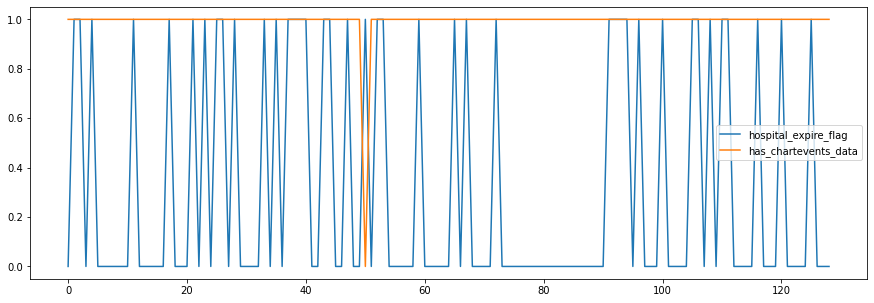

In [8]:
admissions[['hospital_expire_flag','has_chartevents_data']].plot(figsize=(15,5))

<AxesSubplot:>

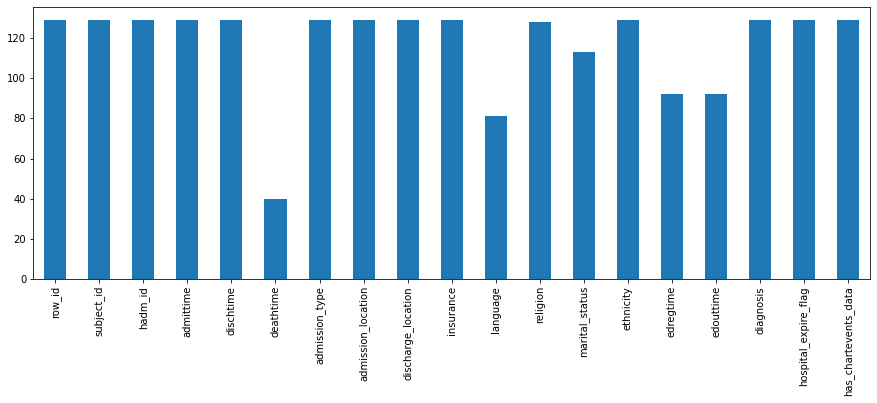

In [9]:
admissions.count().plot(kind ='bar',figsize=(15,5))

# Leemos los datos de "callout" y traducimos los nombres de las columnas

In [67]:
# Nombres de columnas
callout_names = list(callout.columns.values)
# Nombres de columnas traducidos
callout_nombres = ['identificador de fila',
'identificación del sujeto',
'identificación de hadm',
'enviar wardid',
'enviar unidad de cuidados',
'curr wardid',
'unidad de cuidado actual',
'callout wardid',
'servicio de llamada',
'solicitar tele',
'solicitud de respuesta',
'solicitar cdiff',
'solicitar mrsa',
'solicitar vre',
'estado de llamada', 
'salida de llamada',
'descarga wardid', 
'reconocimiento de estado', 
'hora de creación', 
'hora de actualización', 
'hora de reconocimiento', 
'hora de resultado', 
'hora de primera reserva', 
'hora de reserva actual']
# Unimos listas en un diccionario
callout_nombres_dict = dict(zip(callout_names,callout_nombres))
# Creamos el df
callout_columnas = pd.DataFrame([[key, callout_nombres_dict[key]] for key in callout_nombres_dict.keys()], columns=['Name', 'Nombre'])

In [68]:
callout_columnas

,Name,Nombre
0,row_id,identificador de fila
1,subject_id,identificación del sujeto
2,hadm_id,identificación de hadm
3,submit_wardid,enviar wardid
4,submit_careunit,enviar unidad de cuidados
5,curr_wardid,curr wardid
6,curr_careunit,unidad de cuidado actual
7,callout_wardid,callout wardid
8,callout_service,servicio de llamada
9,request_tele,solicitar tele


In [69]:
callout.head(2)

,row_id,subject_id,hadm_id,submit_wardid,submit_careunit,curr_wardid,curr_careunit,callout_wardid,callout_service,request_tele,...,callout_status,callout_outcome,discharge_wardid,acknowledge_status,createtime,updatetime,acknowledgetime,outcometime,firstreservationtime,currentreservationtime
0,3917,10017,199207,7,NaN,45,CCU,1,MED,1,...,Inactive,Discharged,45.0,Acknowledged,2149-05-31 10:44:34,2149-05-31 10:44:34,2149-05-31 15:08:04,2149-05-31 22:40:02,NaN,NaN
1,3919,10026,103770,33,NaN,3,SICU,3,NMED,1,...,Inactive,Discharged,3.0,Revised,2195-05-18 13:56:20,2195-05-19 15:45:30,NaN,2195-05-19 17:40:03,NaN,NaN


In [79]:
# Dsitintos valores que se encuentran en cada columna no numerica
print('unidad de cuidado actual:',callout['curr_careunit'].unique(),'\n')
print('servicio de llamada:',callout['callout_service'].unique(),'\n')
print('unidad de cuidado actual:',callout['curr_careunit'].unique(),'\n')
print('estado de llamada:',callout['callout_status'].unique(),'\n')
print('salida de llamada:',callout['callout_outcome'].unique(),'\n')
print('hora de reconocimiento:',callout['acknowledge_status'].unique(),'\n')
print('unidad de cuidado actual:',callout['curr_careunit'].unique(),'\n')

unidad de cuidado actual: ['CCU' 'SICU' 'CSRU' 'MICU' 'TSICU'] 

servicio de llamada: ['MED' 'NMED' 'CSURG' 'CCU' 'OMED' 'SURG' 'ORTHO' 'CMED' 'TSURG' 'NSURG'] 

unidad de cuidado actual: ['CCU' 'SICU' 'CSRU' 'MICU' 'TSICU'] 

estado de llamada: ['Inactive'] 

salida de llamada: ['Discharged' 'Cancelled'] 

hora de reconocimiento: ['Acknowledged' 'Revised'] 

unidad de cuidado actual: ['CCU' 'SICU' 'CSRU' 'MICU' 'TSICU'] 



In [13]:
callout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   row_id                  77 non-null     int64  
 1   subject_id              77 non-null     int64  
 2   hadm_id                 77 non-null     int64  
 3   submit_wardid           77 non-null     int64  
 4   submit_careunit         9 non-null      object 
 5   curr_wardid             77 non-null     int64  
 6   curr_careunit           77 non-null     object 
 7   callout_wardid          77 non-null     int64  
 8   callout_service         77 non-null     object 
 9   request_tele            77 non-null     int64  
 10  request_resp            77 non-null     int64  
 11  request_cdiff           77 non-null     int64  
 12  request_mrsa            77 non-null     int64  
 13  request_vre             77 non-null     int64  
 14  callout_status          77 non-null     obje

In [14]:
# Verificamos que no hayan duplicados en los id de filas
print(len(callout['row_id'].unique()))
print(len(callout['subject_id'].unique()))
print(len(callout['hadm_id'].unique()))

77
51
67


<AxesSubplot:>

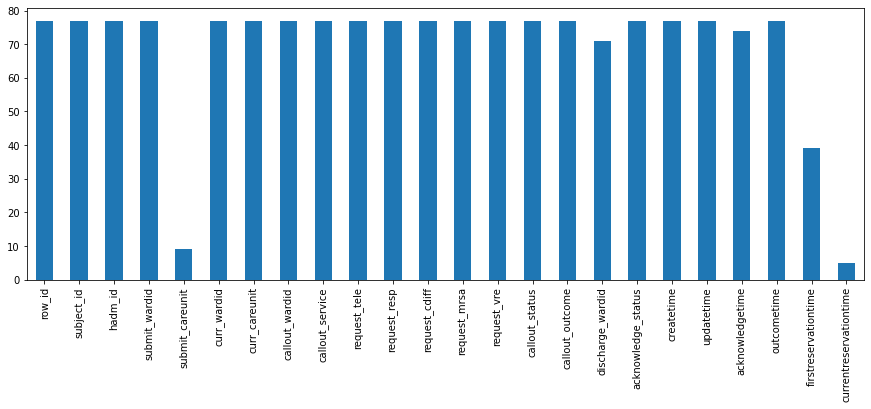

In [15]:
callout.count().plot(kind ='bar',figsize=(15,5))

<AxesSubplot:>

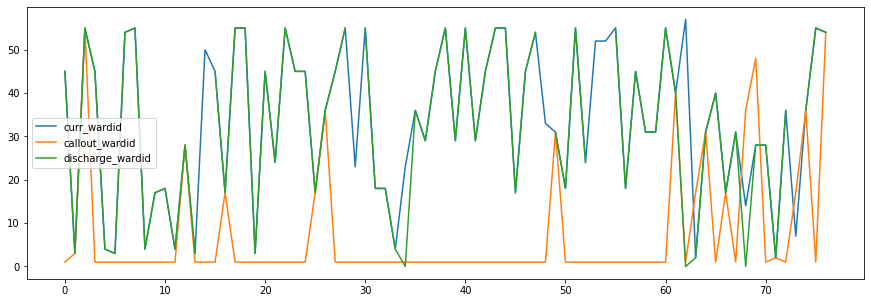

In [16]:
callout[['curr_wardid','callout_wardid','discharge_wardid']].plot(figsize=(15,5))

<AxesSubplot:>

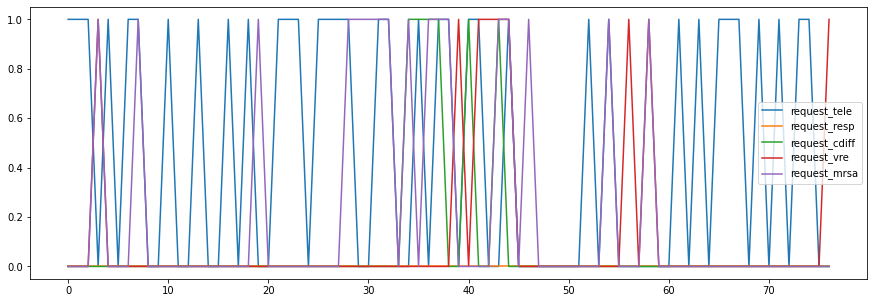

In [17]:
callout[['request_tele','request_resp','request_cdiff','request_vre','request_mrsa']].plot(figsize=(15,5))

# Leemos los datos de "icustays" y traducimos los nombres de las columnas

In [80]:
# Nombres de columnas
icustays_names = list(icustays.columns.values)
# Nombres de columnas traducidos
icustays_nombres = ['identificador de fila',
'identificación del sujeto',
'identificación de hadm',
'icustay id',
'fuente de base de datos',
'primera unidad de cuidados',
'última unidad de cuidados',
'primer pupilo',
'último pupilo',
'a tiempo',
'Fuera de tiempo',
'los']
# Unimos listas en un diccionario
icustays_nombres_dict = dict(zip(icustays_names,icustays_nombres))
# Creamos el df
icustays_columnas = pd.DataFrame([[key, icustays_nombres_dict[key]] for key in icustays_nombres_dict.keys()], columns=['Name', 'Nombre'])

In [81]:
icustays_columnas

,Name,Nombre
0,row_id,identificador de fila
1,subject_id,identificación del sujeto
2,hadm_id,identificación de hadm
3,icustay_id,icustay id
4,dbsource,fuente de base de datos
5,first_careunit,primera unidad de cuidados
6,last_careunit,última unidad de cuidados
7,first_wardid,primer pupilo
8,last_wardid,último pupilo
9,intime,a tiempo


In [82]:
icustays.head(2)

,row_id,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
1,12747,10011,105331,232110,carevue,MICU,MICU,15,15,2126-08-14 22:34:00,2126-08-28 18:59:00,13.8507


In [84]:
# Dsitintos valores que se encuentran en cada columna no numerica
print('fuente de base de datos:',icustays['dbsource'].unique(),'\n')
print('primera unidad de cuidados:',icustays['first_careunit'].unique(),'\n')
print('ultima unidad de cuidados:',icustays['last_careunit'].unique(),'\n')

fuente de base de datos: ['carevue' 'metavision'] 

primera unidad de cuidados: ['MICU' 'CCU' 'SICU' 'CSRU' 'TSICU'] 

ultima unidad de cuidados: ['MICU' 'CCU' 'SICU' 'CSRU' 'TSICU'] 



In [21]:
icustays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          136 non-null    int64  
 1   subject_id      136 non-null    int64  
 2   hadm_id         136 non-null    int64  
 3   icustay_id      136 non-null    int64  
 4   dbsource        136 non-null    object 
 5   first_careunit  136 non-null    object 
 6   last_careunit   136 non-null    object 
 7   first_wardid    136 non-null    int64  
 8   last_wardid     136 non-null    int64  
 9   intime          136 non-null    object 
 10  outtime         136 non-null    object 
 11  los             136 non-null    float64
dtypes: float64(1), int64(6), object(5)
memory usage: 12.9+ KB


In [22]:
# Verificamos que no hayan duplicados en los id de filas
print(len(icustays['row_id'].unique()))
print(len(icustays['subject_id'].unique()))
print(len(icustays['hadm_id'].unique()))

136
100
129


<AxesSubplot:>

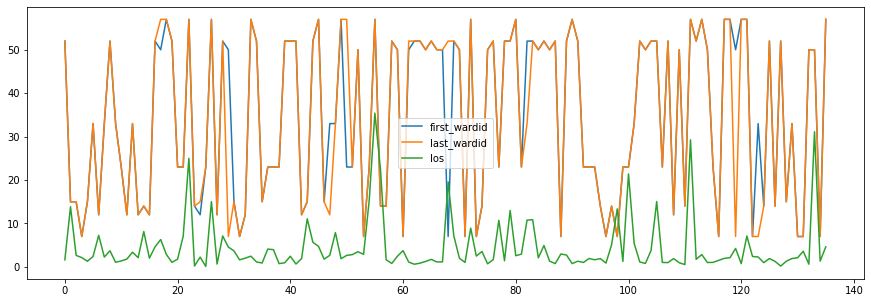

In [23]:
icustays[['first_wardid','last_wardid','los']].plot(figsize = (15,5))

# Leemos los datos de "patients" y traducimos los nombres de las columnas

In [85]:
# Nombres de columnas
patients_names = list(patients.columns.values)
# Nombres de columnas traducidos
patients_nombres = ['identificador de fila',
'identificación del sujeto',
'género',
'dob',
'dod',
'dod hosp',
'dod ssn',
'bandera de caducidad']
# Unimos listas en un diccionario
patients_nombres_dict = dict(zip(patients_names,patients_nombres))
# Creamos el df
patients_columnas = pd.DataFrame([[key, patients_nombres_dict[key]] for key in patients_nombres_dict.keys()], columns=['Name', 'Nombre'])

In [86]:
patients_columnas

,Name,Nombre
0,row_id,identificador de fila
1,subject_id,identificación del sujeto
2,gender,género
3,dob,dob
4,dod,dod
5,dod_hosp,dod hosp
6,dod_ssn,dod ssn
7,expire_flag,bandera de caducidad


In [26]:
patients.head(2)

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1


In [27]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       100 non-null    int64 
 1   subject_id   100 non-null    int64 
 2   gender       100 non-null    object
 3   dob          100 non-null    object
 4   dod          100 non-null    object
 5   dod_hosp     70 non-null     object
 6   dod_ssn      77 non-null     object
 7   expire_flag  100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [28]:
# Verificamos que no hayan duplicados en los id de filas
print(len(patients['row_id'].unique()))
print(len(patients['subject_id'].unique()))

100
100


<AxesSubplot:>

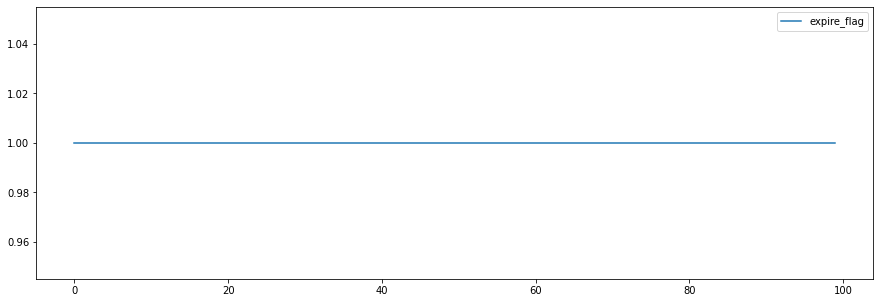

In [29]:
patients[['expire_flag']].plot(figsize=(15,5))

# Leemos los datos de "services" y traducimos los nombres de las columnas

In [89]:
# Nombres de columnas
services_names = list(services.columns.values)
# Nombres de columnas traducidos
services_nombres = ['identificador de fila',
'identificación del sujeto',
'identificación de hadm',
'Tiempo de transferencia',
'servicio anterior',
'servicio actual']
# Unimos listas en un diccionario
services_nombres_dict = dict(zip(services_names,services_nombres))
# Creamos el df
services_columnas = pd.DataFrame([[key, services_nombres_dict[key]] for key in services_nombres_dict.keys()], columns=['Name', 'Nombre'])

In [31]:
services_columnas

,Name,Nombre
0,row_id,identificador de fila
1,subject_id,identificación del sujeto
2,hadm_id,identificación de hadm
3,transfertime,Tiempo de transferencia
4,prev_service,servicio anterior
5,curr_service,servicio actual


In [92]:
# Dsitintos valores que se encuentran en cada columna no numerica
print('servicio anterior:',services['prev_service'].unique(),'\n')
print('servicio actual:',services['curr_service'].unique(),'\n')

servicio anterior: [nan 'MED' 'OMED' 'CMED' 'NSURG' 'TSURG' 'CSURG' 'VSURG' 'SURG' 'NMED'] 

servicio actual: ['MED' 'NMED' 'CSURG' 'SURG' 'VSURG' 'CMED' 'OMED' 'NSURG' 'TSURG' 'TRAUM'
 'ORTHO' 'GU'] 



In [32]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   row_id        163 non-null    int64 
 1   subject_id    163 non-null    int64 
 2   hadm_id       163 non-null    int64 
 3   transfertime  163 non-null    object
 4   prev_service  34 non-null     object
 5   curr_service  163 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.8+ KB


In [33]:
# Verificamos que no hayan duplicados en los id de filas
print(len(services['row_id'].unique()))
print(len(services['subject_id'].unique()))
print(len(services['hadm_id'].unique()))

163
100
129
